In [1]:
import requests
import random
import pandas as pd
import json
from api_keys import weather_api_key
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from matplotlib import rcParams

%load_ext lab_black

In [2]:
path = os.path.join(
    "..",
    "..",
    "UTA-AUS-DATA-PT-07-2020-U-C",
    "homework",
    "06-Python-APIs",
    "Instructions",
    "output_data",
    "cities.csv",
)

In [3]:
cities_data = pd.read_csv(path)

In [4]:
cities_data

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [5]:
cities_data.dtypes

City_ID         int64
City           object
Cloudiness      int64
Country        object
Date            int64
Humidity        int64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

# Cities List

In [6]:
cities_list = cities_data["City"].to_list()
cities_list

['ostrovnoy',
 'mahebourg',
 'qaanaaq',
 'zhuhai',
 'cape town',
 'atuona',
 'flinders',
 'opuwo',
 'tiksi',
 'pushkinskiye gory',
 'aykhal',
 'castro',
 'avarua',
 'saskylakh',
 'constitucion',
 'albany',
 'vilyuysk',
 'ushuaia',
 'bambous virieux',
 'kodinsk',
 'teknaf',
 'busselton',
 'ambon',
 'maragogi',
 'fallon',
 'kantang',
 'colonelganj',
 'punta arenas',
 'rikitea',
 'new norfolk',
 'gobabis',
 'qingdao',
 'port hardy',
 'arman',
 'mamakan',
 'bethel',
 'clinton',
 'varhaug',
 'ayan',
 'mayor pablo lagerenza',
 'hermanus',
 'torbay',
 'yellowknife',
 'kruisfontein',
 'puerto ayora',
 'rosita',
 'beloha',
 'port elizabeth',
 'port alfred',
 'garchitorena',
 'kodiak',
 'mar del plata',
 'taybad',
 'cabo san lucas',
 'tiarei',
 'khatanga',
 'pisco',
 'kolyvan',
 'hofn',
 'bontang',
 'sault sainte marie',
 'zhigansk',
 'thompson',
 'pevek',
 'nanortalik',
 'bilibino',
 'dikson',
 'hambantota',
 'beja',
 'fortuna',
 'ponta do sol',
 'qasigiannguit',
 'butaritari',
 'virginia beach

In [7]:
def extract_data(data):
    return {
        "name": data["name"],
        "lat": data["coord"]["lat"],
        "lon": data["coord"]["lon"],
        "Temperature (F)": data["main"]["temp"],
        "Humidity_%": data["main"]["humidity"],
        "Cloudiness_%": data["clouds"]["all"],
        "Wind Speed_mph": data["wind"]["speed"],
    }

In [8]:
cities_results = []

In [9]:
for city in cities_list:
    data = requests.get(
        "http://api.openweathermap.org/data/2.5/weather",
        params={"q": city, "appid": weather_api_key, "units": "imperial"},
    ).json()
    city_result = extract_data(data)
    cities_results.append(city_result)
cities_results

[{'name': 'Ostrovnoy',
  'lat': 68.05,
  'lon': 39.51,
  'Temperature (F)': 54.7,
  'Humidity_%': 86,
  'Cloudiness_%': 98,
  'Wind Speed_mph': 19.98},
 {'name': 'Mahébourg',
  'lat': -20.41,
  'lon': 57.7,
  'Temperature (F)': 71.6,
  'Humidity_%': 83,
  'Cloudiness_%': 75,
  'Wind Speed_mph': 12.75},
 {'name': 'Qaanaaq',
  'lat': 77.48,
  'lon': -69.36,
  'Temperature (F)': 15.13,
  'Humidity_%': 82,
  'Cloudiness_%': 0,
  'Wind Speed_mph': 5.95},
 {'name': 'Zhuhai',
  'lat': 22.28,
  'lon': 113.57,
  'Temperature (F)': 82.27,
  'Humidity_%': 83,
  'Cloudiness_%': 40,
  'Wind Speed_mph': 14.99},
 {'name': 'Cape Town',
  'lat': -33.93,
  'lon': 18.42,
  'Temperature (F)': 52.16,
  'Humidity_%': 71,
  'Cloudiness_%': 75,
  'Wind Speed_mph': 4.7},
 {'name': 'Atuona',
  'lat': -9.8,
  'lon': -139.03,
  'Temperature (F)': 78.28,
  'Humidity_%': 77,
  'Cloudiness_%': 9,
  'Wind Speed_mph': 19.64},
 {'name': 'Flinders',
  'lat': -34.58,
  'lon': 150.86,
  'Temperature (F)': 49.57,
  'Humidi

# Convert Raw Data to DataFrame

In [10]:
cities_df = pd.DataFrame(cities_results)
cities_df

,name,lat,lon,Temperature (F),Humidity_%,Cloudiness_%,Wind Speed_mph
0,Ostrovnoy,68.05,39.51,54.70,86,98,19.98
1,Mahébourg,-20.41,57.70,71.60,83,75,12.75
2,Qaanaaq,77.48,-69.36,15.13,82,0,5.95
3,Zhuhai,22.28,113.57,82.27,83,40,14.99
4,Cape Town,-33.93,18.42,52.16,71,75,4.70
...,...,...,...,...,...,...,...
543,Yabrūd,33.97,36.66,69.80,73,0,11.41
544,Paraíso,9.84,-83.87,76.10,78,75,8.05
545,Verāval,20.90,70.37,80.33,80,97,11.50
546,Novyy Urgal,51.07,132.56,42.98,95,3,1.03


### DataFrame Data Analysis

In [11]:
cities_df.describe()

,lat,lon,Temperature (F),Humidity_%,Cloudiness_%,Wind Speed_mph
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,19.486624,22.432281,64.574617,71.742701,50.302920,8.456807
std,33.402215,91.924088,16.782507,19.535592,38.271228,5.833030
min,-54.800000,-175.200000,15.130000,8.000000,0.000000,0.360000
25%,-6.475000,-62.062500,51.077500,62.000000,10.000000,4.285000
50%,20.870000,25.675000,66.365000,76.000000,47.000000,7.035000
75%,47.895000,108.172500,77.655000,86.000000,90.000000,11.410000
max,78.220000,179.320000,103.210000,100.000000,100.000000,34.450000


In [12]:
cities_df.dtypes

name                object
lat                float64
lon                float64
Temperature (F)    float64
Humidity_%           int64
Cloudiness_%         int64
Wind Speed_mph     float64
dtype: object

In [13]:
cities_df.astype({"Humidity_%": "float"}).dtypes

name                object
lat                float64
lon                float64
Temperature (F)    float64
Humidity_%         float64
Cloudiness_%         int64
Wind Speed_mph     float64
dtype: object

In [14]:
cities_df[cities_df["Humidity_%"] > 100]

,name,lat,lon,Temperature (F),Humidity_%,Cloudiness_%,Wind Speed_mph


# Ploting the Data

## Latitude vs. Temperature

In [15]:
cities_lat_temp = cities_df.sort_values("Temperature (F)", ascending=False)[
    ["Temperature (F)", "lat"]
]
cities_lat_temp

,Temperature (F),lat
39,103.21,-19.93
76,100.24,-15.23
459,100.00,-23.13
83,99.54,18.90
133,99.45,20.50
...,...,...
241,28.17,64.75
65,28.08,68.05
251,25.29,69.38
309,23.74,72.79


### Latitude vs. Temperature Plot

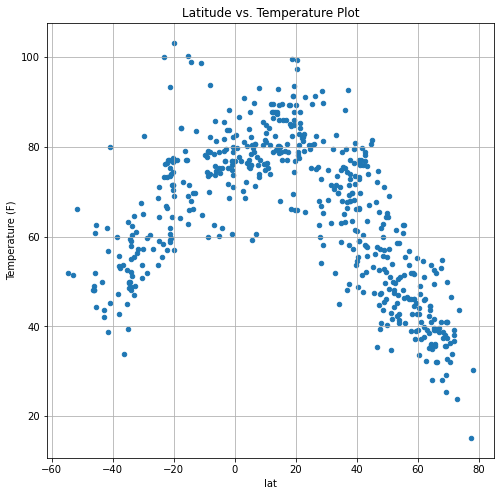

In [16]:
cities_lat_temp.plot(
    kind="scatter",
    x="lat",
    y="Temperature (F)",
    grid=True,
    figsize=(8, 8),
    title="Latitude vs. Temperature Plot",
)
plt.show()

## Latitude vs. Humidity 

In [17]:
cities_lat_humidity = cities_df.sort_values("Humidity_%", ascending=False)[
    ["Humidity_%", "lat"]
]
cities_lat_humidity

,Humidity_%,lat
225,100,-24.87
97,100,35.13
127,100,68.22
290,100,69.41
165,100,65.28
...,...,...
75,13,37.10
133,11,20.50
83,10,18.90
260,10,36.21


### Latitude vs. Humidity Plot

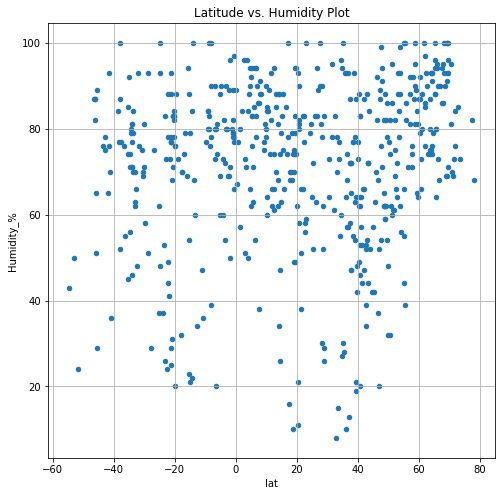

In [18]:
cities_lat_humidity.plot(
    kind="scatter",
    x="lat",
    y="Humidity_%",
    grid=True,
    figsize=(8, 8),
    title="Latitude vs. Humidity Plot",
)
plt.show()

## Latitude vs. Cloudiness

In [19]:
cities_lat_cloud = cities_df.sort_values("Cloudiness_%", ascending=False)[
    ["Cloudiness_%", "lat"]
]
cities_lat_cloud

,Cloudiness_%,lat
547,100,27.72
301,100,-3.14
254,100,-34.48
255,100,9.19
267,100,9.35
...,...,...
266,0,-23.70
167,0,40.28
265,0,29.03
172,0,-14.88


### Latitude vs. Cloudiness Plot

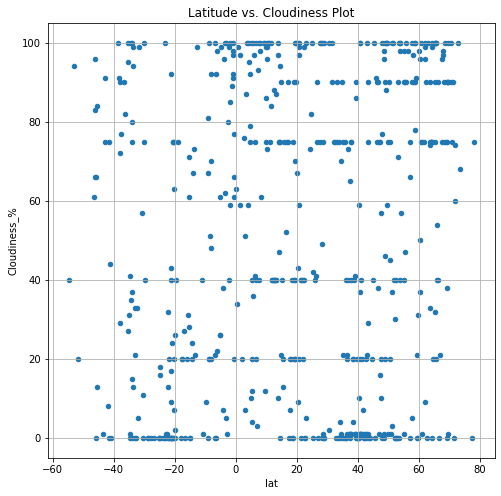

In [20]:
cities_lat_cloud.plot(
    kind="scatter",
    x="lat",
    y="Cloudiness_%",
    grid=True,
    figsize=(8, 8),
    title="Latitude vs. Cloudiness Plot",
)
plt.show()

## Latitude vs. Wind Speed_mph

In [21]:
cities_lat_wind = cities_df.sort_values("Wind Speed_mph", ascending=False)[
    ["Wind Speed_mph", "lat"]
]
cities_lat_wind

,Wind Speed_mph,lat
155,34.45,69.67
154,31.09,71.00
27,31.09,-53.15
181,28.86,65.61
373,28.19,53.70
...,...,...
81,0.67,42.10
237,0.56,-22.07
158,0.49,12.50
495,0.43,42.02


### Latitude vs. Wind SPeed Plot

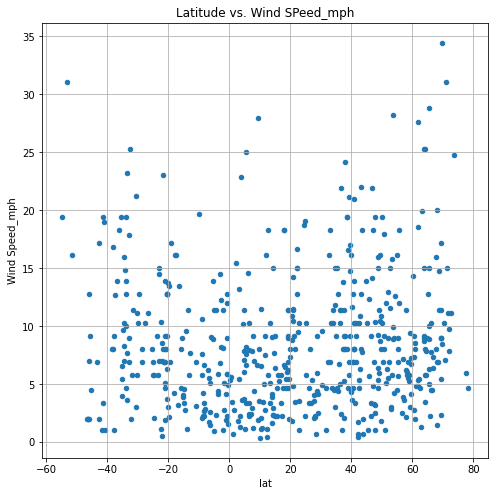

In [22]:
cities_lat_wind.plot(
    kind="scatter",
    x="lat",
    y="Wind Speed_mph",
    grid=True,
    figsize=(8, 8),
    title="Latitude vs. Wind SPeed_mph",
)
plt.show()

# Linear Regression

## Linear Regression - Northern Hemisphere

In [23]:
cities_northern = cities_df[cities_df["lat"] >= 0]
cities_northern

,name,lat,lon,Temperature (F),Humidity_%,Cloudiness_%,Wind Speed_mph
0,Ostrovnoy,68.05,39.51,54.70,86,98,19.98
2,Qaanaaq,77.48,-69.36,15.13,82,0,5.95
3,Zhuhai,22.28,113.57,82.27,83,40,14.99
8,Tiksi,71.69,128.87,39.20,73,0,11.10
9,Pushkinskiye Gory,57.02,28.91,56.71,88,0,7.14
...,...,...,...,...,...,...,...
543,Yabrūd,33.97,36.66,69.80,73,0,11.41
544,Paraíso,9.84,-83.87,76.10,78,75,8.05
545,Verāval,20.90,70.37,80.33,80,97,11.50
546,Novyy Urgal,51.07,132.56,42.98,95,3,1.03


In [24]:
x = cities_northern["lat"].to_frame().values

In [25]:
y = cities_northern["Temperature (F)"].values

In [26]:
model = LinearRegression()

In [27]:
model.fit(x, y)

LinearRegression()

In [28]:
def predict(x):
    return model.predict([[x]])[0]

In [29]:
x_range = np.arange(
    min(cities_northern["Temperature (F)"]),
    max(cities_northern["Temperature (F)"]),
    0.1,
)
y_predict = [predict(x) for x in x_range]

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

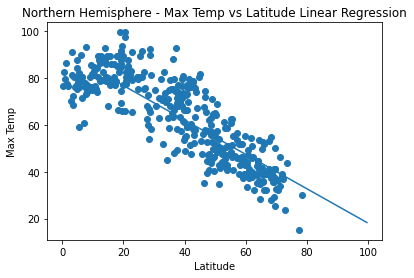

In [30]:
plt.scatter(cities_northern["lat"], cities_northern["Temperature (F)"])
plt.plot(x_range, y_predict)
plt.title("Northern Hemisphere - Max Temp vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

## Linear Regression - Southern Hemisphere

In [31]:
cities_southern = cities_df[cities_df["lat"] < 0]
cities_southern

,name,lat,lon,Temperature (F),Humidity_%,Cloudiness_%,Wind Speed_mph
1,Mahébourg,-20.41,57.70,71.60,83,75,12.75
4,Cape Town,-33.93,18.42,52.16,71,75,4.70
5,Atuona,-9.80,-139.03,78.28,77,9,19.64
6,Flinders,-34.58,150.86,49.57,56,1,15.99
7,Opuwo,-18.06,13.84,64.22,32,0,4.27
...,...,...,...,...,...,...,...
523,Kununurra,-15.77,128.73,77.00,94,31,8.05
526,Viedma,-40.81,-63.00,80.01,36,0,1.01
536,Padang,-0.95,100.35,76.84,79,98,4.12
539,Palu,-0.89,119.87,74.95,79,97,2.24


In [32]:
x = cities_southern["lat"].to_frame().values

In [33]:
y = cities_southern["Temperature (F)"].values

In [34]:
model = LinearRegression()

In [35]:
model.fit(x, y)

LinearRegression()

In [36]:
def predict(x):
    return model.predict([[x]])[0]

In [37]:
x_range = np.arange(
    min(cities_southern["Temperature (F)"]),
    max(cities_southern["Temperature (F)"]),
    0.1,
)
y_predict = [predict(x) for x in x_range]

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

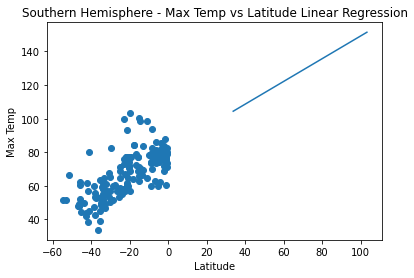

In [38]:
plt.scatter(cities_southern["lat"], cities_southern["Temperature (F)"])
plt.plot(x_range, y_predict)
plt.title("Southern Hemisphere - Max Temp vs Latitude Linear Regression")
plt.rcParams["figure.figsize"] = 10, 8
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

In [39]:
x = cities_northern["lat"].to_frame().values

In [40]:
y = cities_northern["Humidity_%"].values

In [41]:
model = LinearRegression()

In [42]:
model.fit(x, y)

LinearRegression()

In [43]:
def predict(x):
    return model.predict([[x]])[0]

In [44]:
x_range = np.arange(
    min(cities_northern["Temperature (F)"]),
    max(cities_northern["Temperature (F)"]),
    0.1,
)
y_predict = [predict(x) for x in x_range]

###  Northern Hemisphere - Max Humidity vs. Latitude Linear Regression

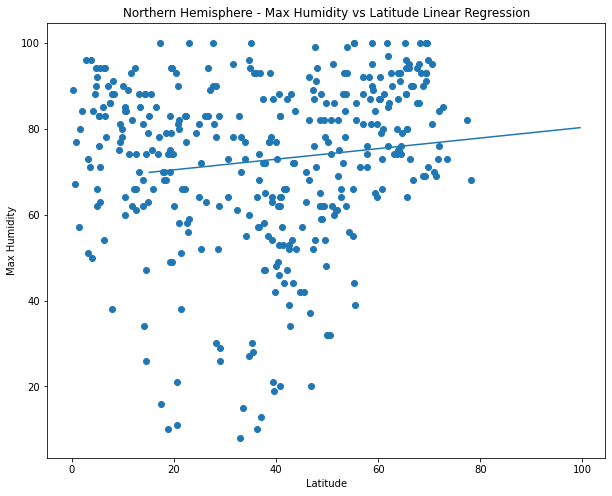

In [45]:
plt.scatter(cities_northern["lat"], cities_northern["Humidity_%"])
plt.plot(x_range, y_predict)
plt.title("Northern Hemisphere - Max Humidity vs Latitude Linear Regression")
plt.rcParams["figure.figsize"] = 10, 8
plt.xlabel("Latitude")
plt.ylabel("Max Humidity")
plt.show()

In [46]:
x = cities_southern["lat"].to_frame().values

In [47]:
y = cities_southern["Humidity_%"].values

In [48]:
model = LinearRegression()

In [49]:
model.fit(x, y)

LinearRegression()

In [50]:
def predict(x):
    return model.predict([[x]])[0]

In [51]:
x_range = np.arange(
    min(cities_northern["Humidity_%"]), max(cities_northern["Humidity_%"]), 0.1,
)
y_predict = [predict(x) for x in x_range]

###  Southern Hemisphere - Max Humidity vs. Latitude Linear Regression

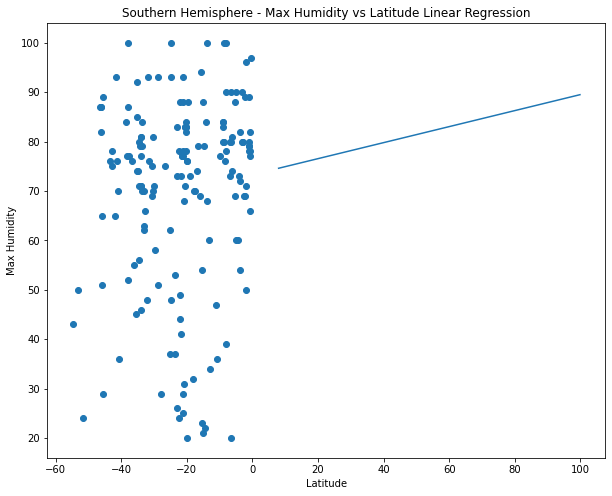

In [52]:
plt.scatter(cities_southern["lat"], cities_southern["Humidity_%"])
plt.plot(x_range, y_predict)
plt.title("Southern Hemisphere - Max Humidity vs Latitude Linear Regression")
plt.rcParams["figure.figsize"] = 10, 8
plt.xlabel("Latitude")
plt.ylabel("Max Humidity")
plt.show()

In [53]:
x = cities_northern["lat"].to_frame().values

In [54]:
y = cities_northern["Cloudiness_%"].values

In [55]:
model = LinearRegression()

In [56]:
model.fit(x, y)

LinearRegression()

In [57]:
def predict(x):
    return model.predict([[x]])[0]

In [58]:
x_range = np.arange(
    min(cities_northern["Cloudiness_%"]), max(cities_northern["Cloudiness_%"]), 0.1,
)
y_predict = [predict(x) for x in x_range]

###  Northern Hemisphere - Max Cloudiness vs. Latitude Linear Regression

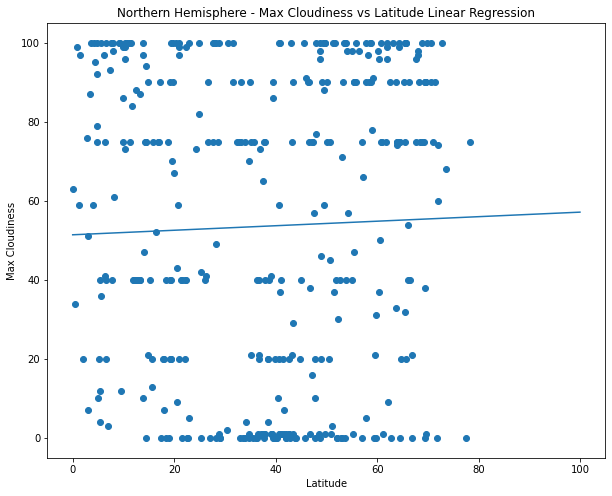

In [59]:
plt.scatter(cities_northern["lat"], cities_northern["Cloudiness_%"])
plt.plot(x_range, y_predict)
plt.title("Northern Hemisphere - Max Cloudiness vs Latitude Linear Regression")
plt.rcParams["figure.figsize"] = 10, 8
plt.xlabel("Latitude")
plt.ylabel("Max Cloudiness")
plt.show()

In [60]:
x = cities_southern["lat"].to_frame().values

In [61]:
y = cities_southern["Cloudiness_%"].values

In [62]:
model = LinearRegression()

In [63]:
model.fit(x, y)

LinearRegression()

In [64]:
def predict(x):
    return model.predict([[x]])[0]

In [65]:
x_range = np.arange(
    min(cities_southern["Cloudiness_%"]), max(cities_southern["Cloudiness_%"]), 0.1,
)
y_predict = [predict(x) for x in x_range]

###  Southern Hemisphere - Max Cloudiness vs. Latitude Linear Regression

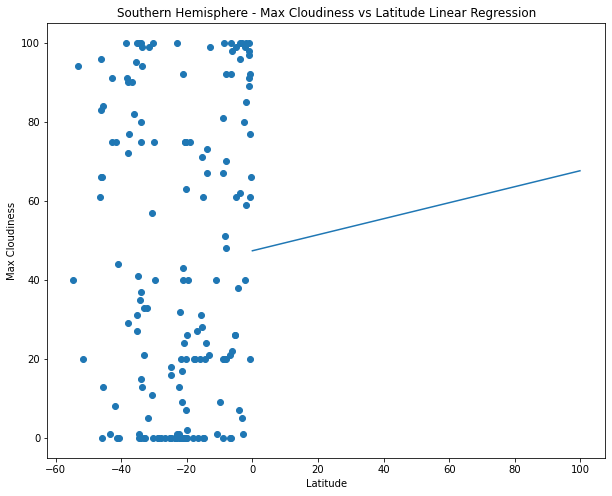

In [66]:
plt.scatter(cities_southern["lat"], cities_southern["Cloudiness_%"])
plt.plot(x_range, y_predict)
plt.title("Southern Hemisphere - Max Cloudiness vs Latitude Linear Regression")
plt.rcParams["figure.figsize"] = 10, 8
plt.xlabel("Latitude")
plt.ylabel("Max Cloudiness")
plt.show()

In [67]:
X = cities_northern["lat"].to_frame().values

In [68]:
y = cities_northern["Wind Speed_mph"].values

In [69]:
model = LinearRegression()

In [70]:
model.fit(X, y)

LinearRegression()

In [71]:
def predict(x):
    return model.predict([[x]])[0]

In [72]:
x_range = np.arange(
    min(cities_northern["Cloudiness_%"]), max(cities_northern["Cloudiness_%"]), 0.1,
)
y_predict = [predict(x) for x in x_range]

###  Northern Hemisphere - Max Wind SPeed mph vs. Latitude Linear Regression

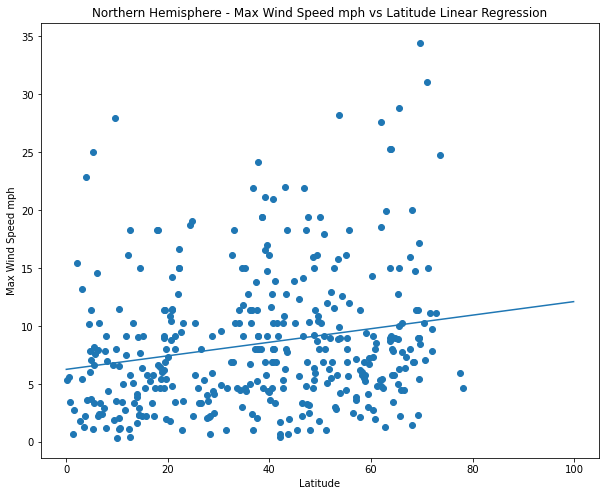

In [73]:
plt.scatter(cities_northern["lat"], cities_northern["Wind Speed_mph"])
plt.plot(x_range, y_predict)
plt.title("Northern Hemisphere - Max Wind Speed mph vs Latitude Linear Regression")
plt.rcParams["figure.figsize"] = 10, 8
plt.xlabel("Latitude")
plt.ylabel("Max Wind Speed mph")
plt.show()

In [74]:
X = cities_southern["lat"].to_frame().values

In [75]:
y = cities_southern["Wind Speed_mph"].values

In [76]:
model = LinearRegression()

In [77]:
model.fit(X, y)

LinearRegression()

In [78]:
def predict(x):
    return model.predict([[x]])[0]

In [79]:
def predict(x):
    return model.predict([[x]])[0]

In [80]:
x_range = np.arange(
    min(cities_southern["Wind Speed_mph"]), max(cities_southern["Wind Speed_mph"]), 0.1,
)
y_predict = [predict(x) for x in x_range]

###  Southern Hemisphere - Max Wind SPeed mph vs. Latitude Linear Regression

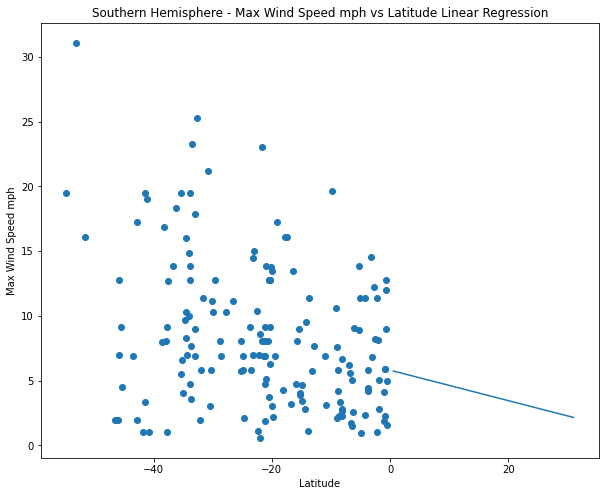

In [81]:
plt.scatter(cities_southern["lat"], cities_southern["Wind Speed_mph"])
plt.plot(x_range, y_predict)
plt.title("Southern Hemisphere - Max Wind Speed mph vs Latitude Linear Regression")
plt.rcParams["figure.figsize"] = 10, 8
plt.xlabel("Latitude")
plt.ylabel("Max Wind Speed mph")
plt.show()